In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import collections
import ast
from wordcloud import WordCloud
from nltk.corpus import stopwords
import re
from io import BytesIO
import base64
from PIL import Image, ImageDraw, ImageFont
import emoji
from collections import Counter
from string import punctuation

from matplotlib import colors
import colorsys

sns.set(rc = {'figure.figsize':(15, 7)})
sns.set_style('white')
title_fontsize = 15

In [103]:
cleaned_df = pd.read_csv('./data/word_cloud_df.csv', index_col=None)

In [46]:
df = pd.read_csv('./data/cleaned_up_data/final_cleaned.csv')
df.head()

,Datetime,Text,Stock Name,sentiment
0,2015-01-01,Our Penny Stock Picks Gained Over 968% In the ...,AMZN,0.998861
1,2015-01-01,Our Penny Stock Picks Gained Over 968% In the ...,AAPL,0.998860
2,2015-01-01,#GOOGLE 'C' : knows you drank too much last ni...,GOOG,0.744512
3,2015-01-01,Did Samsung really overtake Apple in consumer ...,AAPL,0.061477
4,2015-01-01,Clay Trader Apple Inc. $AAPL Stock Chart Techn...,AAPL,0.998718


In [133]:
punc = punctuation + '‘’“”1234567890…ðŸ‘‰ðŸ‘ŒðŸ’¦âœ¨✰♡*•˛❤•'
website_pattern = r'(https?:\/\/(?:www\.)?[-a-zA-Z0-9@:%._+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}[-a-zA-Z0-9()@:%_+.~#?&/=]*)'
numbers = '\d+'
usernames = '@[^\s]+'
tickers = '\$[^\s]+'
extra_spaces = '  +'
hashtags = '\$[^\s]+'
next_lines = '\\n'

In [134]:
# clean up the df

def remove_substring(string, pattern, replacement=''):
    
    substrings_to_remove = re.findall(pattern, string)
    for substring in substrings_to_remove:
        string = string.replace(substring, replacement)
        
    return string

def reduce_repeated_chars(string):
    new_string = ''
    i = 0
    while i < len(string):
        j = i + 1
        while j < len(string) and string[j] == string[i]:
            j += 1
        new_string += string[i] + (string[i] if j - i >= 2 else '')
        i = j
    return new_string

def process_text(text, print_every=10000):
    
    texts = text.lower()
    texts = remove_substring(texts, website_pattern)
    texts = remove_substring(texts, usernames)
    texts = remove_substring(texts, tickers)
    texts = reduce_repeated_chars(texts)
    texts = remove_substring(texts, numbers)
    texts = remove_substring(texts, hashtags)
    texts = remove_substring(texts, next_lines, ' ')
    texts = emoji.demojize(texts, delimiters=("", " "))
    texts = re.sub(r'(\#)(\S+)', '', texts)
    texts = re.sub(r'(\$)([A-Za-z]+)', '', texts)
    texts = texts.replace('&#39;', "'")
    texts = ''.join([c for c in texts if c not in punc])
    texts = ' '.join(x for x in texts.split() if x not in stopwords.words('english'))
    
    if globals()['idx'] % print_every == 0:
        print(f'{idx} reached')
    
    globals()['idx'] +=1

    return texts

In [82]:
# separate bullish and bearish

df['sentiment'] = df.sentiment.apply(lambda x: 'Bull' if x>0.5 else 'Bear')
df_bull = df[df.sentiment == 'Bull'][['Stock Name', 'Text']]
df_bear = df[df.sentiment == 'Bear'][['Stock Name', 'Text']]

In [55]:
# create separate dataframes for each stock and sentiment
for stock in df['Stock Name'].unique():
    bull = df_bull[df_bull['Stock Name'] == stock]
    bear = df_bear[df_bear['Stock Name'] == stock]
    globals()[f'{stock}_bull'] = bull
    globals()[f'{stock}_bear'] = bear   

In [123]:
ZS_bear

,Stock Name,Text
10637,ZS,al zeynepsu
17823,ZS,й zb fászz cfx ffdregistered zdzeď vsscxdxbxdz...
24730,ZS,make weekly low rebounding holding below day l...
30726,ZS,end week down pts closing below day learn driv...
43660,ZS,beans looking really weak today pining
...,...,...
4697515,ZS,information technology consumer discretionary ...
4697516,ZS,information technology communication services ...
4697526,ZS,awaiting short signal based signals net profit...
4697529,ZS,trading ideas awaiting short signal profitabil...


In [138]:
typ = 'bull'
for stock in df_bull['Stock Name'].unique():
    print('-'*25, 'starting', stock)
    
    dta = globals()[f'{stock}_{typ}']

    idx = 0
    dta['Text'] = dta['Text'].apply(lambda x: process_text(x, print_every=50000))
    all_sentences = ' '.join(dta.Text)

    # split the string into words
    all_words = all_sentences.split()

    # count the frequency of each word
    word_freq = Counter(all_words)
    
    dff = pd.DataFrame.from_dict(word_freq, orient='index', columns=[f'{stock}_{typ}'])
    dff = dff.sort_values(f'{stock}_{typ}', ascending=False).head(500)
    
    globals()[f'{stock}_{typ}_cleaned'] = dff

    print('-'*25, stock, 'finished')

------------------------- starting AMZN
0 reached
50000 reached
100000 reached
150000 reached
200000 reached
250000 reached
300000 reached
350000 reached
400000 reached
450000 reached
500000 reached


/var/folders/qp/1k1ym6rd1z34yt05vjspksl40000gn/T/ipykernel_68061/3552537660.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dta['Text'] = dta['Text'].apply(lambda x: process_text(x, print_every=50000))


------------------------- AMZN finished
------------------------- starting AAPL
0 reached
50000 reached
100000 reached
150000 reached
200000 reached
250000 reached
300000 reached
350000 reached
400000 reached
450000 reached
500000 reached
550000 reached
600000 reached
650000 reached
700000 reached
750000 reached
800000 reached
850000 reached
900000 reached
950000 reached
1000000 reached
1050000 reached


/var/folders/qp/1k1ym6rd1z34yt05vjspksl40000gn/T/ipykernel_68061/3552537660.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dta['Text'] = dta['Text'].apply(lambda x: process_text(x, print_every=50000))


------------------------- AAPL finished
------------------------- starting GOOG
0 reached
50000 reached
100000 reached
150000 reached
200000 reached
250000 reached
300000 reached
350000 reached
400000 reached
450000 reached


/var/folders/qp/1k1ym6rd1z34yt05vjspksl40000gn/T/ipykernel_68061/3552537660.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dta['Text'] = dta['Text'].apply(lambda x: process_text(x, print_every=50000))


------------------------- GOOG finished
------------------------- starting TSLA
0 reached
50000 reached
100000 reached
150000 reached
200000 reached
250000 reached
300000 reached
350000 reached
400000 reached
450000 reached
500000 reached
550000 reached
600000 reached


/var/folders/qp/1k1ym6rd1z34yt05vjspksl40000gn/T/ipykernel_68061/3552537660.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dta['Text'] = dta['Text'].apply(lambda x: process_text(x, print_every=50000))


------------------------- TSLA finished
------------------------- starting MSFT
0 reached
50000 reached
100000 reached
150000 reached
200000 reached
250000 reached


/var/folders/qp/1k1ym6rd1z34yt05vjspksl40000gn/T/ipykernel_68061/3552537660.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dta['Text'] = dta['Text'].apply(lambda x: process_text(x, print_every=50000))


------------------------- MSFT finished
------------------------- starting KO
0 reached


/var/folders/qp/1k1ym6rd1z34yt05vjspksl40000gn/T/ipykernel_68061/3552537660.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dta['Text'] = dta['Text'].apply(lambda x: process_text(x, print_every=50000))


------------------------- KO finished
------------------------- starting COST
0 reached


/var/folders/qp/1k1ym6rd1z34yt05vjspksl40000gn/T/ipykernel_68061/3552537660.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dta['Text'] = dta['Text'].apply(lambda x: process_text(x, print_every=50000))


------------------------- COST finished
------------------------- starting CRM
0 reached


/var/folders/qp/1k1ym6rd1z34yt05vjspksl40000gn/T/ipykernel_68061/3552537660.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dta['Text'] = dta['Text'].apply(lambda x: process_text(x, print_every=50000))


------------------------- CRM finished
------------------------- starting NIO
0 reached


/var/folders/qp/1k1ym6rd1z34yt05vjspksl40000gn/T/ipykernel_68061/3552537660.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dta['Text'] = dta['Text'].apply(lambda x: process_text(x, print_every=50000))


------------------------- NIO finished
------------------------- starting PYPL
0 reached


/var/folders/qp/1k1ym6rd1z34yt05vjspksl40000gn/T/ipykernel_68061/3552537660.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dta['Text'] = dta['Text'].apply(lambda x: process_text(x, print_every=50000))


------------------------- PYPL finished
------------------------- starting DIS
0 reached


/var/folders/qp/1k1ym6rd1z34yt05vjspksl40000gn/T/ipykernel_68061/3552537660.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dta['Text'] = dta['Text'].apply(lambda x: process_text(x, print_every=50000))


------------------------- DIS finished
------------------------- starting BA
0 reached


/var/folders/qp/1k1ym6rd1z34yt05vjspksl40000gn/T/ipykernel_68061/3552537660.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dta['Text'] = dta['Text'].apply(lambda x: process_text(x, print_every=50000))


------------------------- BA finished
------------------------- starting ZS
0 reached


/var/folders/qp/1k1ym6rd1z34yt05vjspksl40000gn/T/ipykernel_68061/3552537660.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dta['Text'] = dta['Text'].apply(lambda x: process_text(x, print_every=50000))


------------------------- ZS finished
------------------------- starting BX
0 reached


/var/folders/qp/1k1ym6rd1z34yt05vjspksl40000gn/T/ipykernel_68061/3552537660.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dta['Text'] = dta['Text'].apply(lambda x: process_text(x, print_every=50000))


------------------------- BX finished
------------------------- starting NOC
0 reached


/var/folders/qp/1k1ym6rd1z34yt05vjspksl40000gn/T/ipykernel_68061/3552537660.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dta['Text'] = dta['Text'].apply(lambda x: process_text(x, print_every=50000))


------------------------- NOC finished
------------------------- starting NFLX
0 reached
50000 reached


/var/folders/qp/1k1ym6rd1z34yt05vjspksl40000gn/T/ipykernel_68061/3552537660.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dta['Text'] = dta['Text'].apply(lambda x: process_text(x, print_every=50000))


------------------------- NFLX finished
------------------------- starting TSM
0 reached
50000 reached


/var/folders/qp/1k1ym6rd1z34yt05vjspksl40000gn/T/ipykernel_68061/3552537660.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dta['Text'] = dta['Text'].apply(lambda x: process_text(x, print_every=50000))


------------------------- TSM finished
------------------------- starting META
0 reached


/var/folders/qp/1k1ym6rd1z34yt05vjspksl40000gn/T/ipykernel_68061/3552537660.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dta['Text'] = dta['Text'].apply(lambda x: process_text(x, print_every=50000))


------------------------- META finished
------------------------- starting PG
0 reached
------------------------- PG finished


/var/folders/qp/1k1ym6rd1z34yt05vjspksl40000gn/T/ipykernel_68061/3552537660.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dta['Text'] = dta['Text'].apply(lambda x: process_text(x, print_every=50000))


In [181]:
dframes = []
for stock in df_bull['Stock Name'].unique():
    dframes.append(globals()[f'{stock}_bull_cleaned'])
    dframes.append(globals()[f'{stock}_bear_cleaned'])

In [191]:
dff = pd.concat(dframes)
text_bull = dff[f'{company}_bull'].dropna().to_dict()
text_bear = dff[f'{company}_bear'].dropna().to_dict()
dff = dff[dff.index.str.len() > 1]
dff.index.name = 'words'

In [192]:
dff.to_csv('./data/cleaned_up_data/topics/final_wordcloud_summary.csv')

In [198]:
dff = pd.read_csv('./data/cleaned_up_data/topics/final_wordcloud_summary.csv', index_col='words')

In [116]:
df_word_freq = pd.DataFrame.from_dict(word_freq, orient='index', columns=['frequency'])

# reset the index to convert the word column to a regular column
df_word_freq = df_word_freq.reset_index()

# rename the columns to 'word' and 'frequency'
df_word_freq = df_word_freq.rename(columns={'index': 'word'})

df_test = df_word_freq.sort_values('frequency', ascending=False).head(500)

In [117]:
dct_test = df_test.set_index('word').to_dict()['frequency']

In [200]:
dff[f'{company}_bull'].dropna().to_dict()

{'apple': 170081.0,
 'read': 150240.0,
 'iphone': 81254.0,
 'stock': 79412.0,
 'new': 58553.0,
 'free': 58030.0,
 'like': 55589.0,
 'get': 53610.0,
 'market': 43494.0,
 'make': 40812.0,
 'inc': 40776.0,
 'day': 39481.0,
 'buy': 39320.0,
 'today': 39171.0,
 'join': 37510.0,
 'watch': 37371.0,
 'well': 36578.0,
 'stocks': 33994.0,
 'use': 33577.0,
 'trading': 32543.0,
 'link': 31395.0,
 'sure': 30363.0,
 'aapl': 30086.0,
 'price': 29257.0,
 'top': 28106.0,
 'trade': 27539.0,
 'week': 26084.0,
 'next': 25089.0,
 'via': 23566.0,
 'earnings': 23089.0,
 'big': 22272.0,
 'news': 22071.0,
 'see': 21808.0,
 'us': 21785.0,
 'apples': 21714.0,
 'time': 21447.0,
 'one': 21365.0,
 'could': 19997.0,
 'options': 19714.0,
 'calls': 19633.0,
 'ios': 19562.0,
 'last': 18784.0,
 'good': 18369.0,
 'long': 18198.0,
 'tech': 18012.0,
 'app': 17976.0,
 'still': 17024.0,
 'back': 16126.0,
 'best': 15849.0,
 'call': 15587.0,
 'share': 15278.0,
 'target': 15194.0,
 'shares': 15105.0,
 'year': 14522.0,
 'high': 

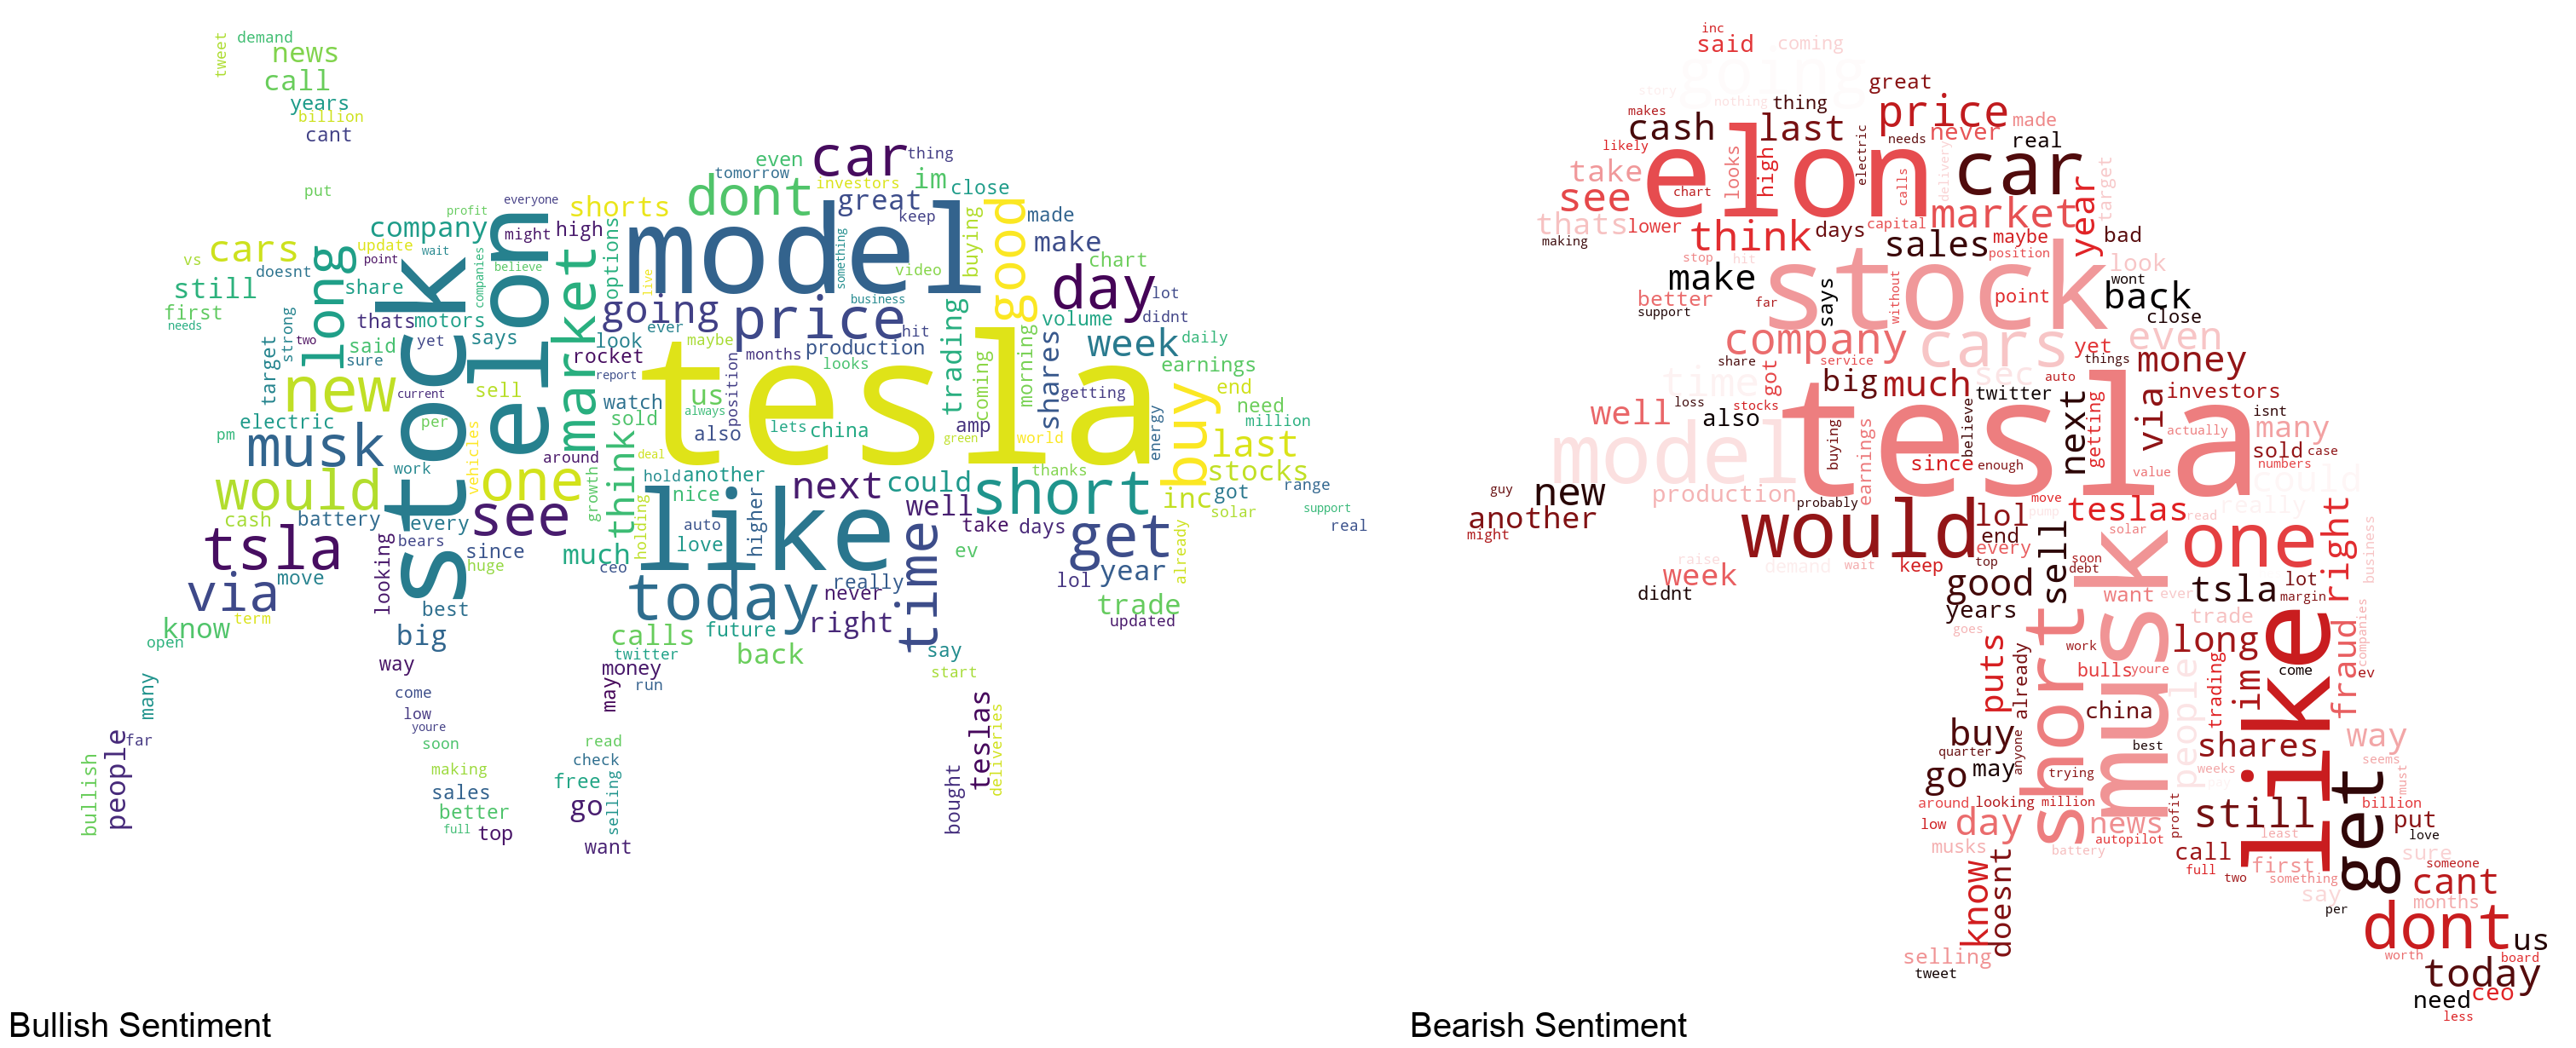

In [183]:
def plot_wordcloud(company):
    if company == 'All':
        # change this when you're done with testing
        company = 'AAPL'

    text_bull = dff[f'{company}_bull'].dropna().to_dict()
    text_bear = dff[f'{company}_bear'].dropna().to_dict()

    # Load the two images and convert them to numpy arrays
    mask1 = np.array(Image.open('./logos/bull.png'))
    mask2 = np.array(Image.open('./logos/bear.png'))

    # Create the WordCloud objects with the masks
    wc1 = WordCloud(background_color='white', mask=mask1)
    wc2 = WordCloud(background_color='white', mask=mask2)

    # Generate the word clouds
    wc1.generate_from_frequencies(text_bull)
    wc2.generate_from_frequencies(text_bear)
    
    # defining function for color func
    def hsl_color_func(word, font_size, position, orientation, random_state = None, **kwargs):
        return(hsl_val % np.random.randint(0,100))
    
    # change color for bear
    color = 'xkcd:blood red'
    r,g,b = colors.to_rgb(color)
    h,l,s = colorsys.rgb_to_hls(r,g,b)
    hsl_val = 'hsl(' + str(h*360) + ', 75%%, %d%%)'
    color_bear = hsl_color_func
    wc2.recolor(color_func=color_bear)

    # Combine the two images side by side
    combined_width = mask1.shape[1] + mask2.shape[1]
    combined_height = max(mask1.shape[0], mask2.shape[0])

    combined_image = Image.new('RGB', (combined_width, combined_height), color='white')
    combined_image.paste(Image.fromarray(wc1.to_array()), (0, 0))
    combined_image.paste(Image.fromarray(wc2.to_array()), (mask1.shape[1], 0))
    
    draw = ImageDraw.Draw(combined_image)
    font = ImageFont.truetype('Arial.ttf', size=40)

    draw.text((10, combined_height-50), 'Bullish Sentiment', fill='black', font=font)
    draw.text((mask1.shape[1]+10, combined_height-50), 'Bearish Sentiment', fill='black', font=font)

    img = BytesIO()
    combined_image.save(img, format='PNG')

#     return 'data:image/png;base64,{}'.format(base64.b64encode(img.getvalue()).decode())
    return combined_image

plot_wordcloud('TSLA')